In [54]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
sns.set(rc={'figure.figsize':(18,11)})

In [2]:
df = pd.read_csv('bikes_mod.csv')

### check duplicated ?

In [4]:
df.duplicated().sum()

0

### data types and null ?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            10886 non-null  object 
 1   season              10672 non-null  object 
 2   holiday             10030 non-null  float64
 3   workingday          9388 non-null   float64
 4   weather             8746 non-null   object 
 5   temp                8104 non-null   float64
 6   humidity            7462 non-null   float64
 7   windspeed           6820 non-null   float64
 8   casual              10886 non-null  int64  
 9   registered          10886 non-null  int64  
 10  rented_bikes_count  10886 non-null  int64  
 11  Profit              10886 non-null  float64
dtypes: float64(6), int64(3), object(3)
memory usage: 1020.7+ KB


### chechk missing data ?

In [11]:
missing_data = df.isnull().sum().to_frame()
missing_data.columns = ['No_missing_data']
missing_data

,No_missing_data
datetime,0
season,214
holiday,856
workingday,1498
weather,2140
temp,2782
humidity,3424
windspeed,4066
casual,0
registered,0


In [12]:
df

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,Profit
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,107.328767
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40,275.028767
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32,201.928767
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13,94.428767
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1,4.128767
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336,1534.928767
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241,1165.128767
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168,773.828767
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129,709.328767


In [14]:
df['temp'].describe().to_frame()

,temp
count,8104.000000
mean,20.317665
std,7.818568
min,0.820000
25%,13.940000
50%,20.500000
75%,26.240000
max,41.000000


<AxesSubplot:xlabel='temp', ylabel='Count'>

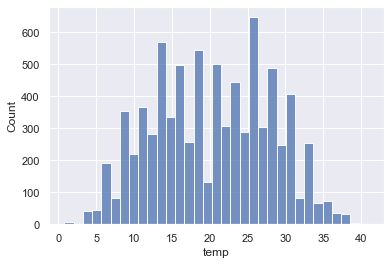

In [16]:
sns.histplot(data = df , x='temp')

<AxesSubplot:xlabel='temp'>

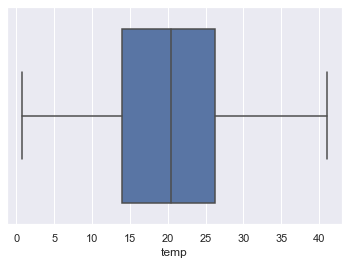

In [17]:
sns.boxplot(data = df , x = 'temp')

In [18]:
df['holiday'].describe()

count    10030.000000
mean         0.029113
std          0.168131
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: holiday, dtype: float64

In [24]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'humidity', 'windspeed', 'casual', 'registered', 'rented_bikes_count',
       'Profit'],
      dtype='object')

In [26]:
df['humidity'].describe()

count    7462.000000
mean       61.790673
std        19.262084
min         0.000000
25%        47.000000
50%        62.000000
75%        77.000000
max       100.000000
Name: humidity, dtype: float64

<AxesSubplot:xlabel='humidity', ylabel='Count'>

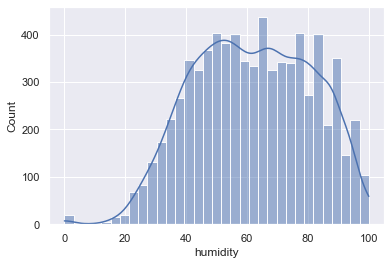

In [29]:
sns.histplot(data=df,x='humidity',kde=True)

<AxesSubplot:xlabel='humidity'>

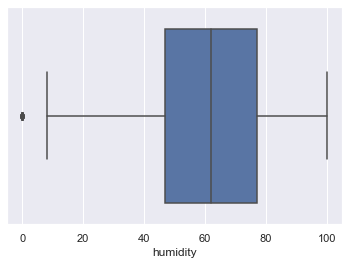

In [30]:
sns.boxplot(data=df,x='humidity')

In [44]:
q1= df['humidity'].quantile(0.25)
q3 = df['humidity'].quantile(0.75)
iqr=q3-q1
max_whisker = q3 + (1.5*iqr)
min_whisker = q1 - (1.5*iqr)

In [49]:
df[df['humidity'] < min_whisker].shape[0]

19

In [51]:
df['rented_bikes_count'].describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: rented_bikes_count, dtype: float64

<AxesSubplot:xlabel='rented_bikes_count', ylabel='Count'>

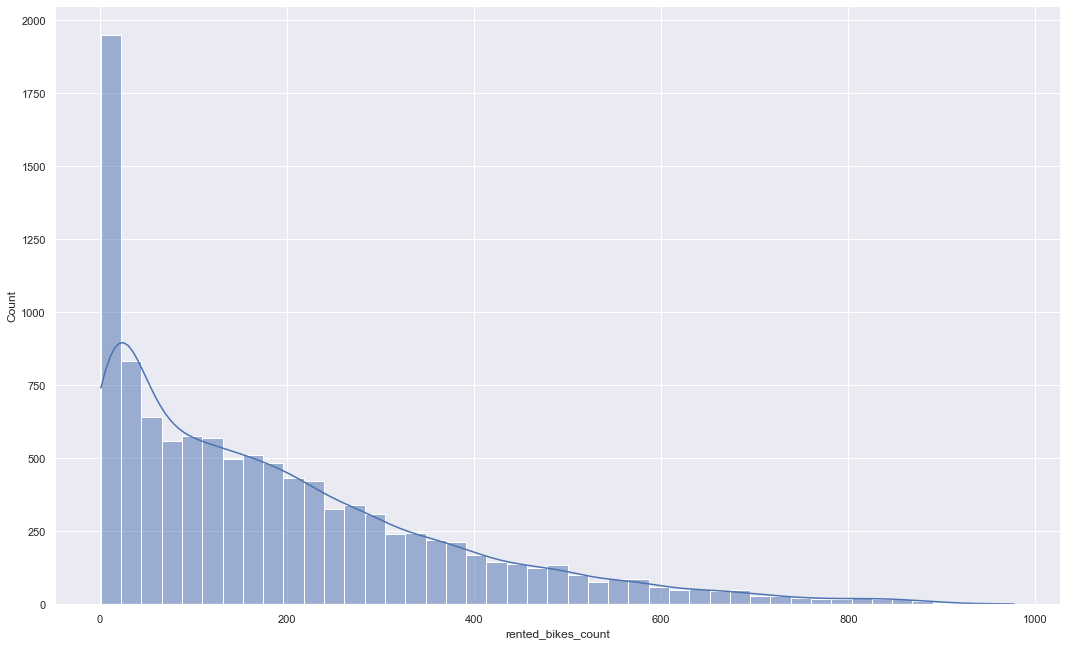

In [55]:
sns.histplot(data=df,x='rented_bikes_count',kde=True)

<AxesSubplot:xlabel='rented_bikes_count'>

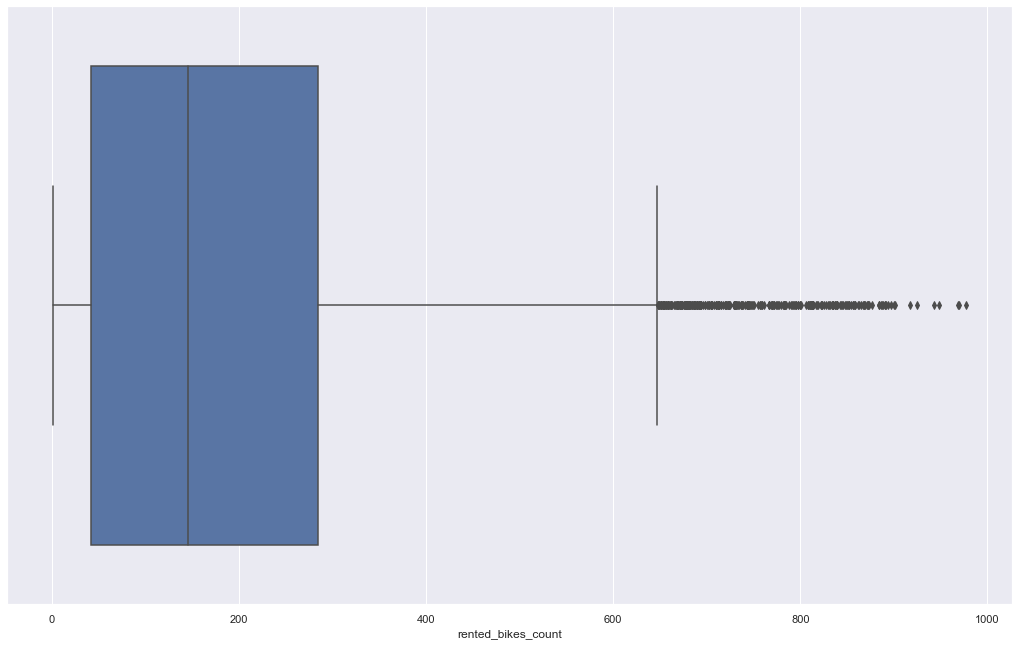

In [56]:
sns.boxplot(data=df,x='rented_bikes_count')

In [58]:
q1= df['rented_bikes_count'].quantile(0.25)
q3 = df['rented_bikes_count'].quantile(0.75)
iqr=q3-q1
max_whisker = q3 + (1.5*iqr)
min_whisker = q1 - (1.5*iqr)

In [59]:
df[df['rented_bikes_count'] > max_whisker].shape[0]

300

In [61]:
df['season'].value_counts()

Winter    2688
Fall      2680
Summer    2670
Spring    2634
Name: season, dtype: int64

<AxesSubplot:xlabel='season', ylabel='count'>

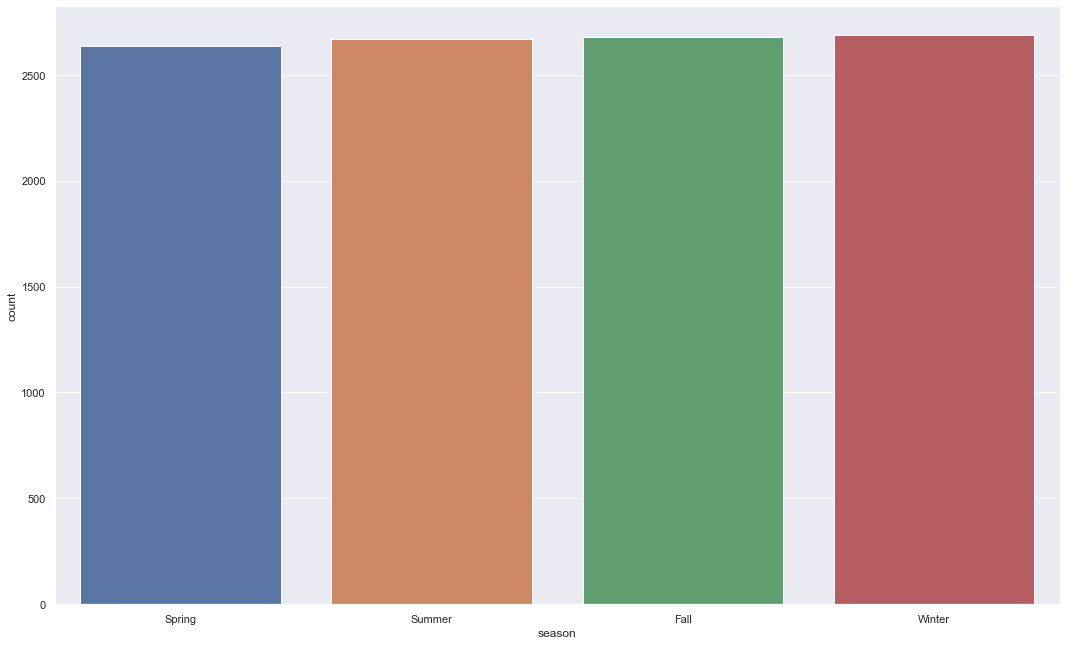

In [62]:
sns.countplot(data= df,x='season')

# exctract a year,month, and hour features from date time

In [66]:
df['Year']=df['datetime'].apply(lambda x: x.split("-")[0])

In [67]:
df['Month']=df['datetime'].apply(lambda x: x.split('-')[1] )

In [72]:
df['hours']=df['datetime'].apply(lambda x: x.split(' ')[1] )

In [74]:
df['day']=df['datetime'].apply(lambda x: x.split(' ')[0] )
df['day']

0        2011-01-01
1        2011-01-01
2        2011-01-01
3        2011-01-01
4        2011-01-01
            ...    
10881    2012-12-19
10882    2012-12-19
10883    2012-12-19
10884    2012-12-19
10885    2012-12-19
Name: day, Length: 10886, dtype: object

### top year of profit  2011 or 2012 ??

In [82]:
x=df.groupby('Year')['Profit'].sum().to_frame()
x.reset_index(inplace=True)
x

,Year,Profit
0,2011,5.371621e+06
1,2012,8.652604e+06


<AxesSubplot:xlabel='Year', ylabel='Profit'>

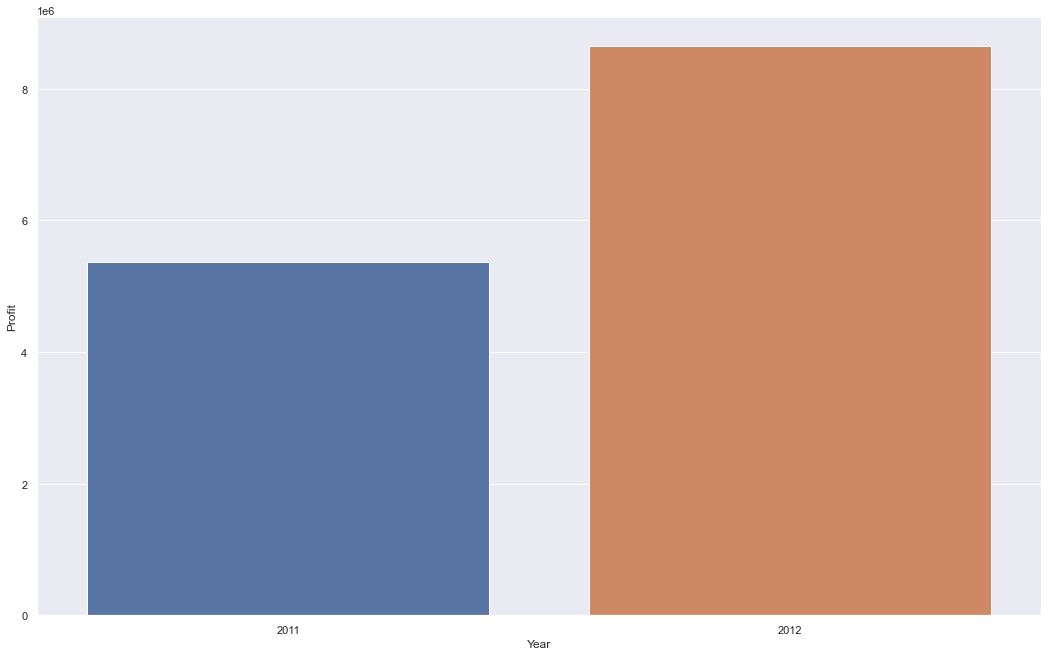

In [87]:
sns.barplot(data =x , x= x['Year'], y = x['Profit'])

### top month of profit ?? 

In [92]:
zx =df.groupby('Month')['Profit'].mean().sort_values(ascending= False).to_frame()
zx.reset_index(inplace=True)
zx

,Month,Profit
0,07,1732.361004
1,06,1727.631947
2,09,1656.591803
3,08,1655.357057
4,05,1527.469776
5,10,1518.257417
6,04,1356.722386
7,11,1191.646220
8,03,995.696359
9,12,962.896750


<AxesSubplot:xlabel='Month', ylabel='Profit'>

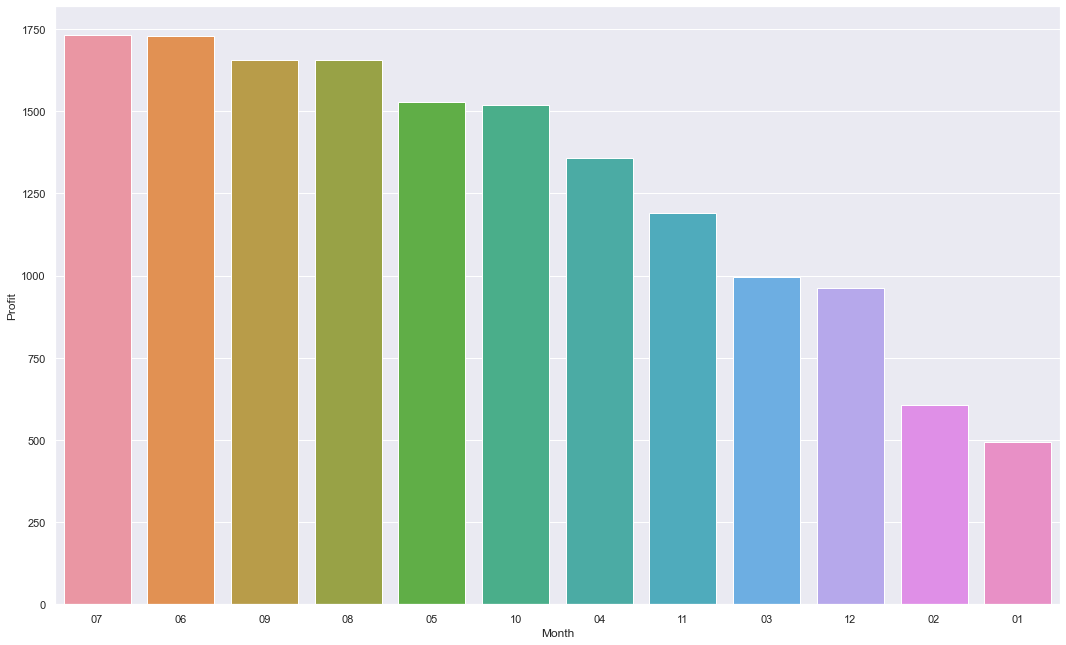

In [93]:
sns.barplot(data = zx , x= zx['Month'], y = zx['Profit'])

## top day of profit in 2011,2012 ??

In [109]:
x=df.groupby('day')['Profit'].sum().sort_values(ascending=False).head(10).to_frame()
x.reset_index(inplace=True)
x

,day,Profit
0,2012-05-19,79649.090411
1,2012-09-15,78230.090411
2,2012-03-17,74390.190411
3,2012-10-06,73345.290411
4,2012-04-07,71431.790411
5,2012-06-16,71337.190411
6,2012-06-02,70967.390411
7,2012-08-18,70283.690411
8,2012-09-09,68524.990411
9,2012-04-14,68129.390411


<AxesSubplot:xlabel='day', ylabel='Profit'>

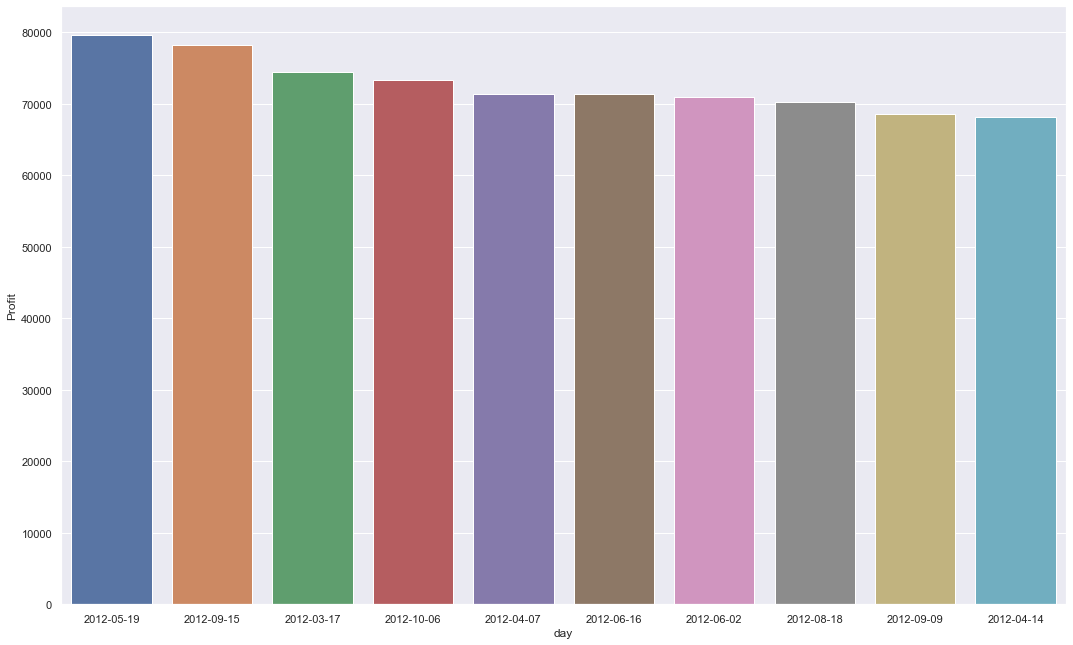

In [107]:
sns.barplot(data = df , x = x['day'] , y=x['Profit'])

### top hour of profit ??

In [121]:
x=df.groupby('hours')['Profit'].sum().sort_values(ascending=False).head(10).to_frame()
x.reset_index(inplace=True)
x

,hours,Profit
0,17:00:00,1.362850e+06
1,18:00:00,1.205913e+06
2,16:00:00,1.061936e+06
3,15:00:00,9.457800e+05
4,13:00:00,9.410371e+05
5,14:00:00,9.277974e+05
6,12:00:00,9.077766e+05
7,19:00:00,9.067962e+05
8,08:00:00,8.361259e+05
9,11:00:00,7.645868e+05


<AxesSubplot:xlabel='hours', ylabel='Profit'>

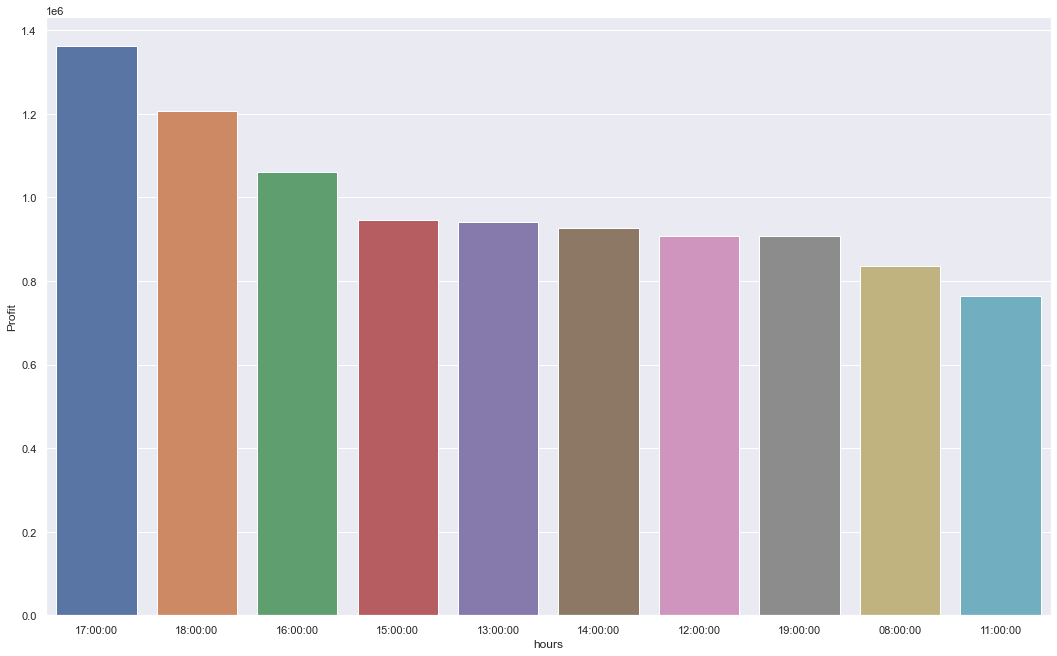

In [128]:
sns.barplot(data = x , x=x['hours'], y=x['Profit'] )

#### : check distribution  during  2011


In [129]:
df[df['day'].str.contains('2011')]

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,Profit,Year,Month,day,hours
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,107.328767,2011,01,2011-01-01,00:00:00
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40,275.028767,2011,01,2011-01-01,01:00:00
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32,201.928767,2011,01,2011-01-01,02:00:00
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13,94.428767,2011,01,2011-01-01,03:00:00
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1,4.128767,2011,01,2011-01-01,04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5417,2011-12-19 19:00:00,Winter,0.0,1.0,Mist,14.76,53.0,11.0014,17,234,251,1298.428767,2011,12,2011-12-19,19:00:00
5418,2011-12-19 20:00:00,Winter,0.0,1.0,Clear,16.40,40.0,NaN,9,197,206,1001.728767,2011,12,2011-12-19,20:00:00
5419,2011-12-19 21:00:00,Winter,0.0,1.0,Mist,14.76,53.0,NaN,15,112,127,739.428767,2011,12,2011-12-19,21:00:00
5420,2011-12-19 22:00:00,Winter,0.0,1.0,Mist,14.76,57.0,11.0014,12,95,107,614.728767,2011,12,2011-12-19,22:00:00


<AxesSubplot:xlabel='Profit', ylabel='Density'>

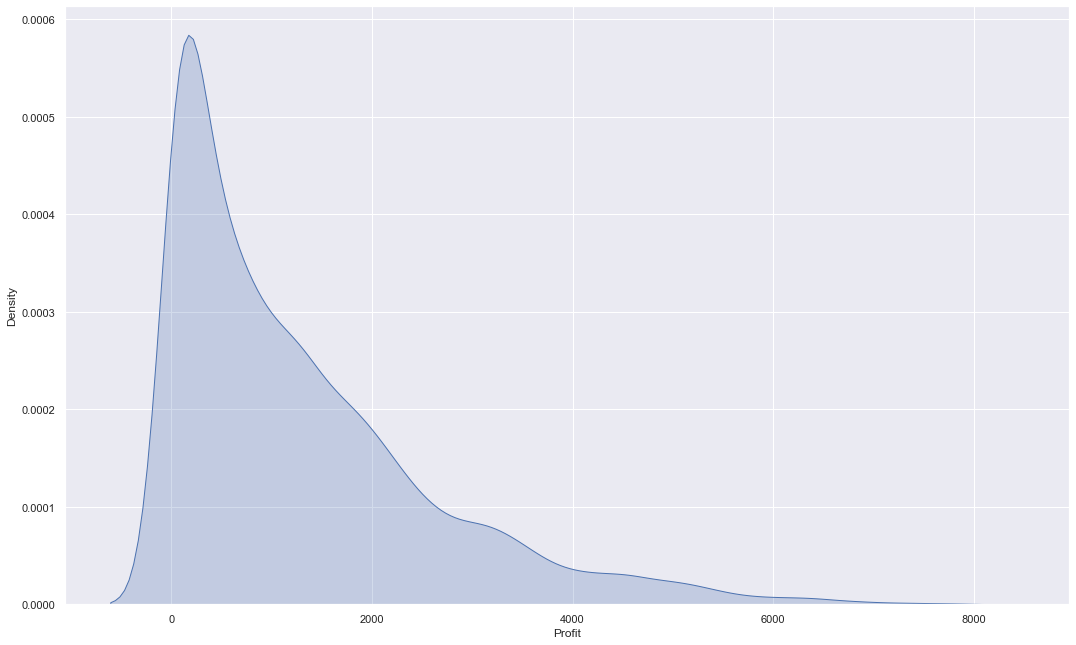

In [131]:
sns.kdeplot(data = df , x = 'Profit', shade=True)
### right skewness

#### : Create a tracing boxplots (multiple box-plots in one figure) that shows the profit for each month and colored by year to distnguish between them

<AxesSubplot:xlabel='Month', ylabel='Profit'>

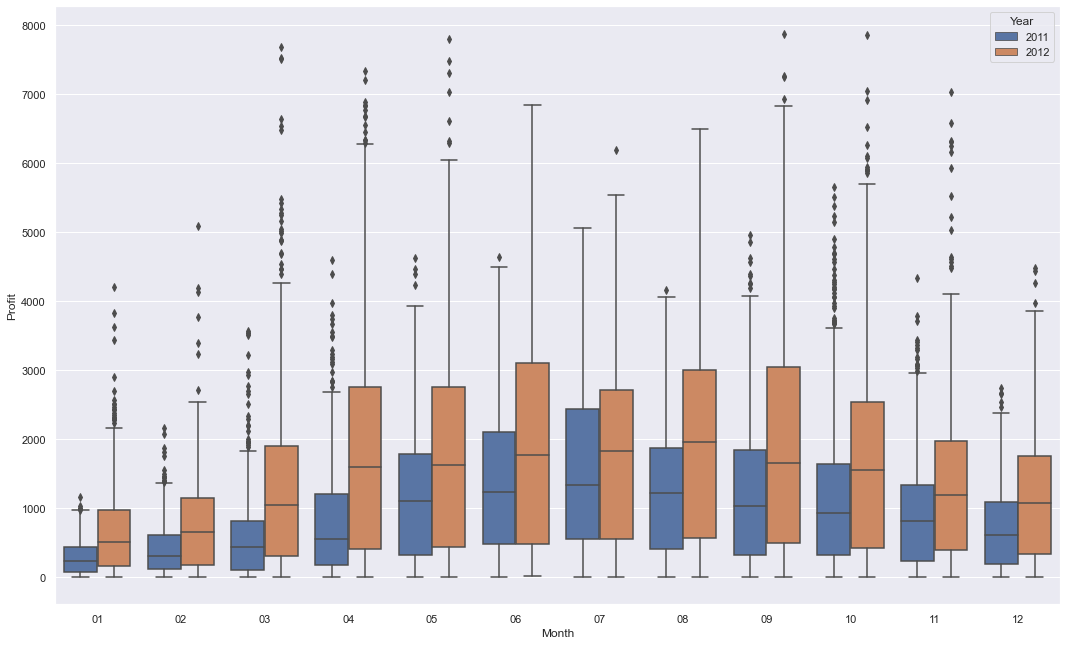

In [136]:
sns.boxplot(data = df , x = 'Month' , y = 'Profit', hue = 'Year')

### top month of rented_bikes_count 

In [148]:
x=df.groupby('Month')['rented_bikes_count'].sum().sort_values(ascending=False).to_frame()
x.reset_index(inplace=True)
x

,Month,rented_bikes_count
0,06,220733
1,07,214617
2,08,213516
3,09,212529
4,10,207434
5,05,200147
6,11,176440
7,04,167402
8,12,160160
9,03,133501


<AxesSubplot:xlabel='rented_bikes_count', ylabel='Month'>

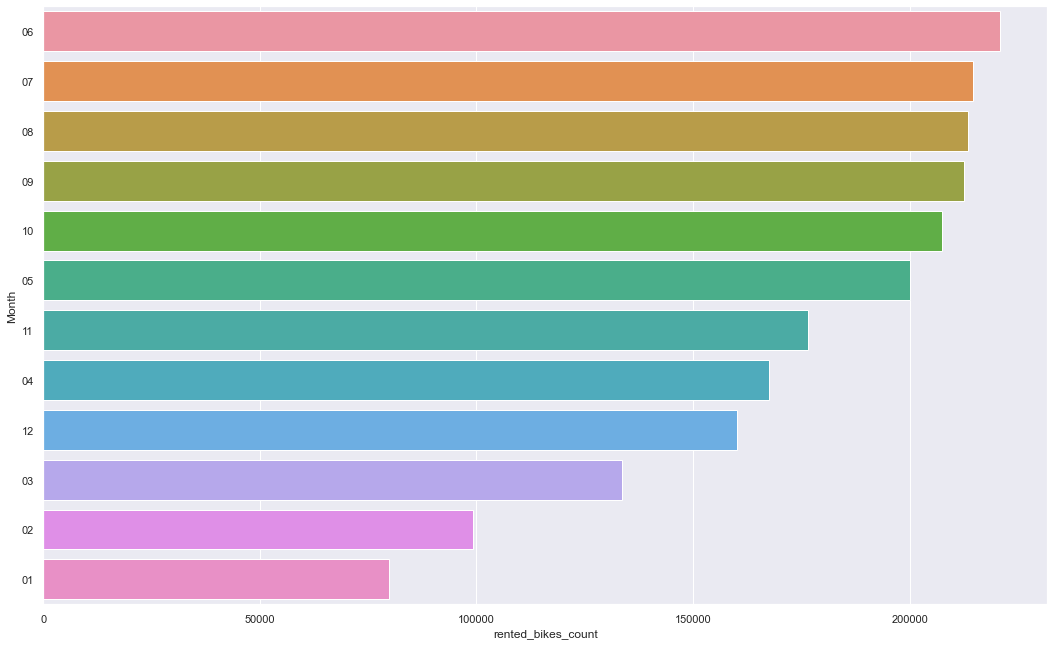

In [150]:
sns.barplot(data=df , x=x['rented_bikes_count'], y=x['Month'])

### top day of rented_bikes_count ?? 

In [155]:
x=df.groupby('hours')['rented_bikes_count'].sum().sort_values(ascending=False).to_frame()
x.reset_index(inplace=True)
x

,hours,rented_bikes_count
0,17:00:00,213757
1,18:00:00,196472
2,08:00:00,165060
3,16:00:00,144266
4,19:00:00,143767
5,13:00:00,117551
6,12:00:00,116968
7,15:00:00,115960
8,14:00:00,111010
9,20:00:00,104204


<AxesSubplot:xlabel='rented_bikes_count', ylabel='hours'>

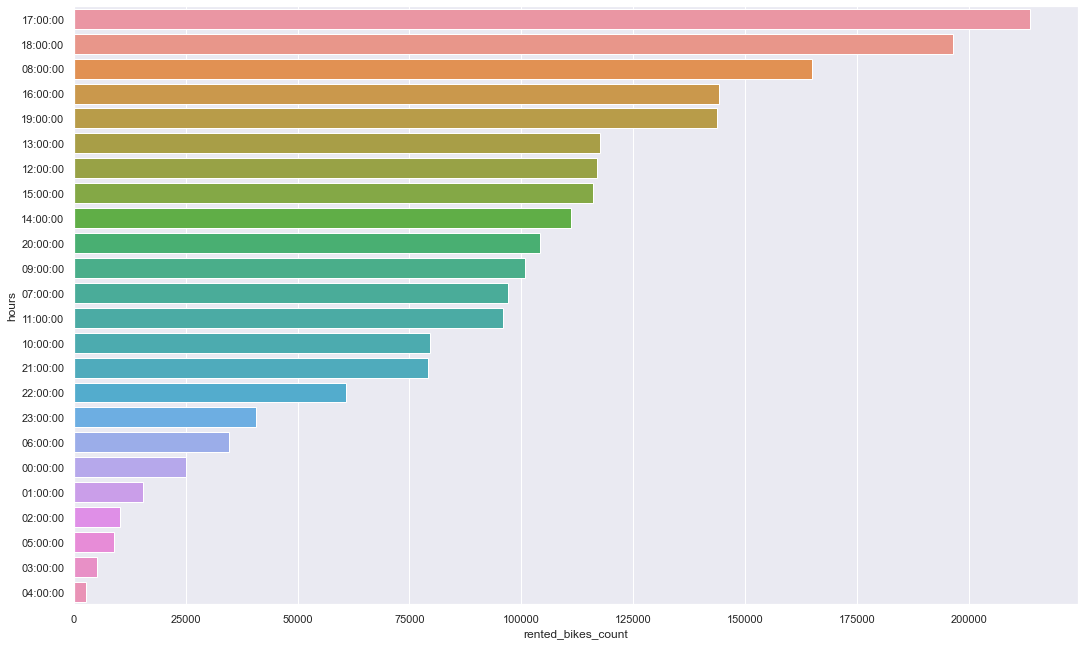

In [156]:
sns.barplot(data=df , x=x['rented_bikes_count'], y=x['hours'])

### top 10 day of rented_bikes_count ??

In [162]:
x=df.groupby('day')['rented_bikes_count'].sum().sort_values(ascending=False).head(10).to_frame()
x.reset_index(inplace=True)
x

,day,rented_bikes_count
0,2012-09-15,8714
1,2012-05-19,8294
2,2012-09-09,8227
3,2012-10-05,8156
4,2012-06-02,8120
5,2012-09-14,8009
6,2012-10-06,7965
7,2012-09-12,7870
8,2012-08-18,7865
9,2012-03-17,7836


<AxesSubplot:xlabel='rented_bikes_count', ylabel='day'>

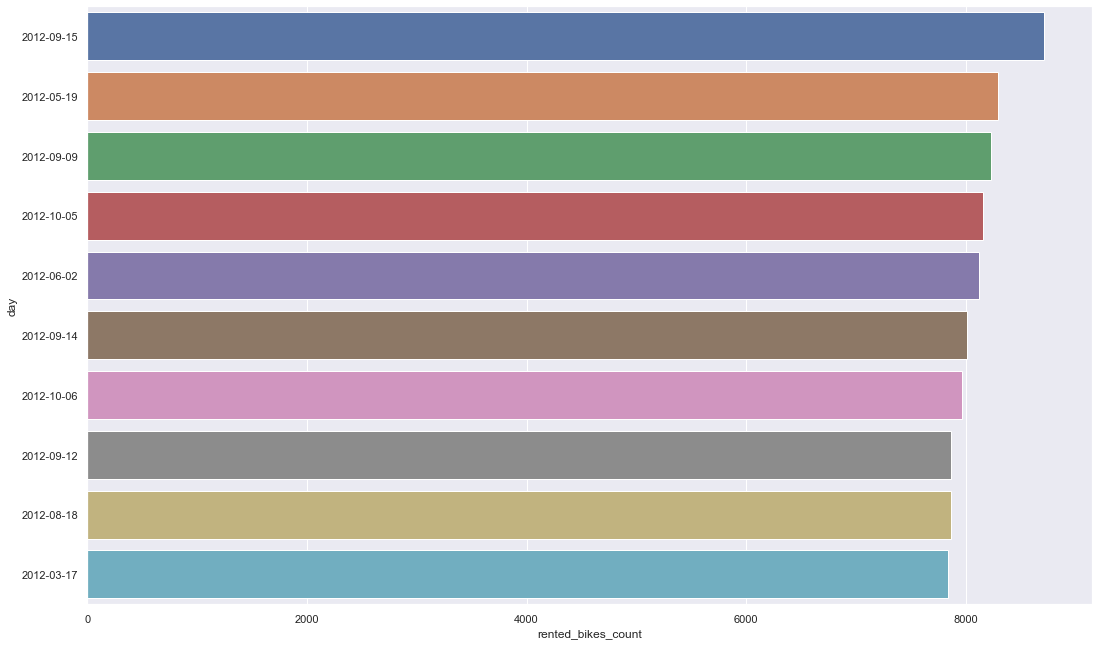

In [163]:
sns.barplot(data=df , x=x['rented_bikes_count'], y=x['day'])

### top season oof profit ??

In [ ]:
x=df.groupby('season')['Profit'].sum().sort_values(ascending=False).to_frame()
x.reset_index(inplace=True)
x

<AxesSubplot:xlabel='season', ylabel='Profit'>

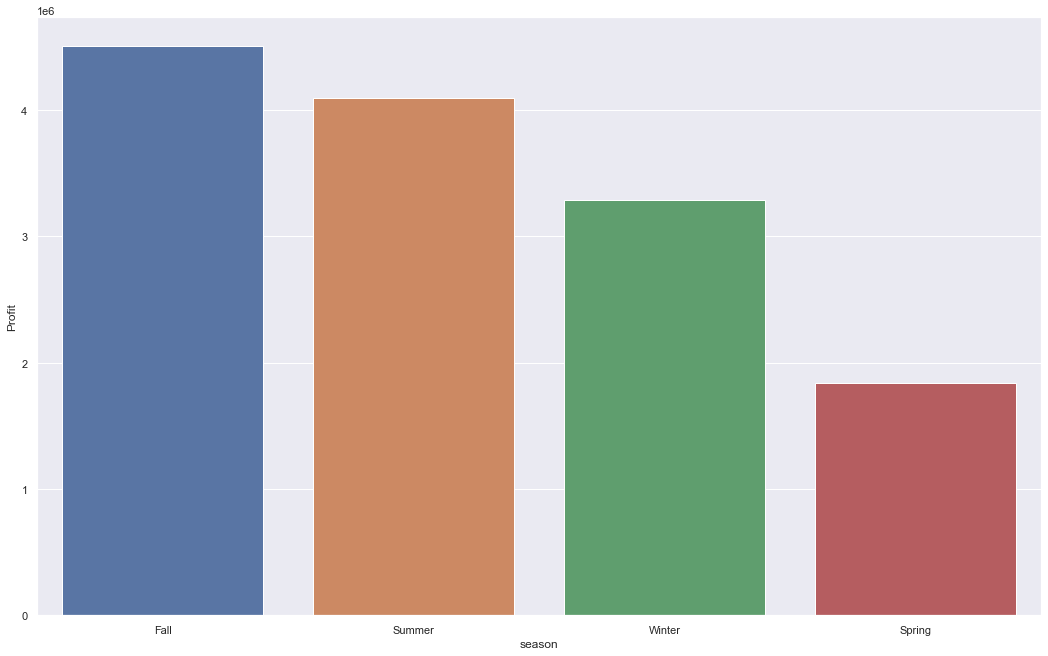

In [168]:
sns.barplot(data = x , x= x['season'], y=x['Profit'])

### top seaason of rented_bikes_count ??

In [169]:
x=df.groupby('season')['rented_bikes_count'].sum().sort_values(ascending=False).to_frame()
x.reset_index(inplace=True)
x

,season,rented_bikes_count
0,Fall,628384
1,Summer,573280
2,Winter,534031
3,Spring,305779


<AxesSubplot:xlabel='season', ylabel='rented_bikes_count'>

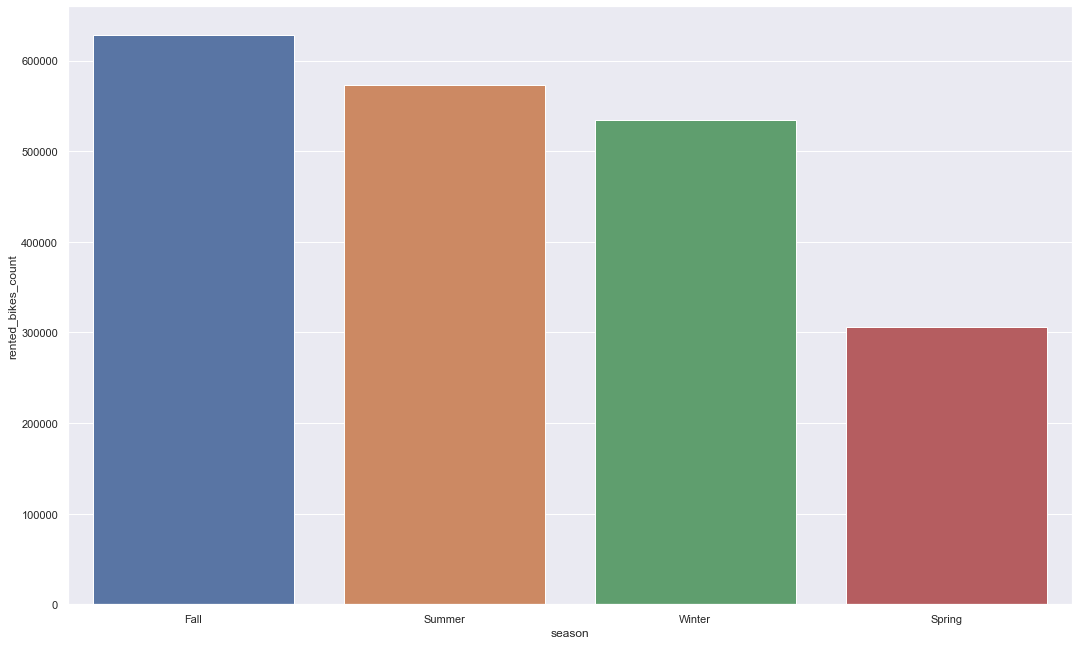

In [170]:
sns.barplot(data = x , x= x['season'], y=x['rented_bikes_count'])

### avreage profit each season ??

In [206]:
z=df.groupby('season')['Profit'].mean().sort_values(ascending=False)

<AxesSubplot:xlabel='season', ylabel='Profit'>

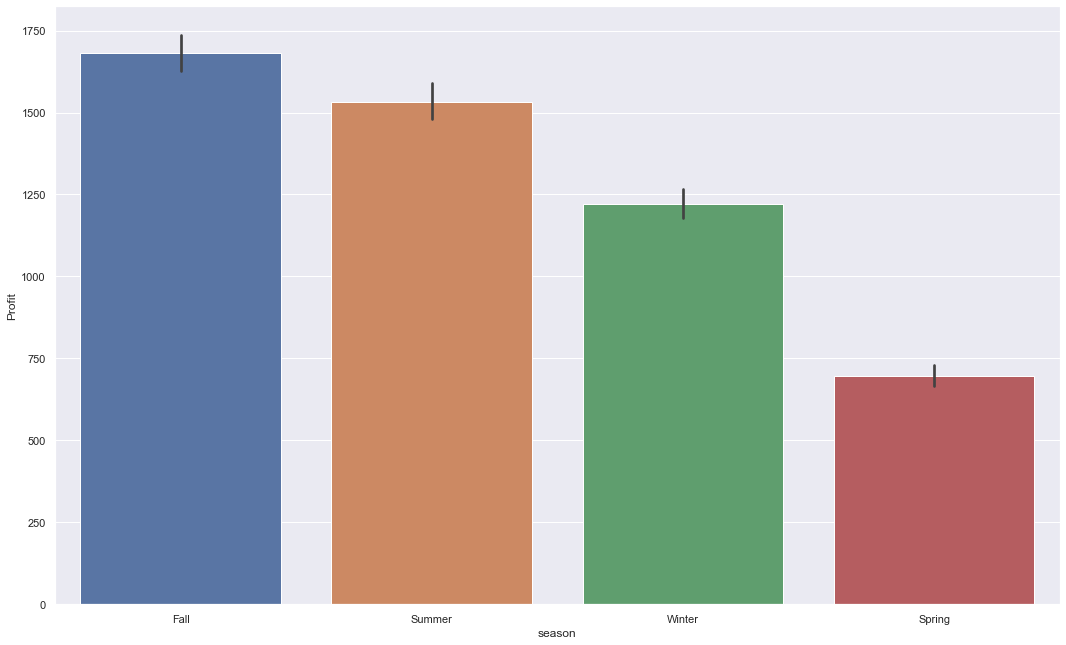

In [207]:
sns.barplot(data = df , x = 'season' , y= 'Profit' , order=z.index)

### avreage profit per month ??

In [210]:
x=df.groupby('Month')['Profit'].mean().sort_values(ascending=False).to_frame()
x.reset_index(inplace=True)
x

,Month,Profit
0,07,1732.361004
1,06,1727.631947
2,09,1656.591803
3,08,1655.357057
4,05,1527.469776
5,10,1518.257417
6,04,1356.722386
7,11,1191.646220
8,03,995.696359
9,12,962.896750


<AxesSubplot:xlabel='Month', ylabel='Profit'>

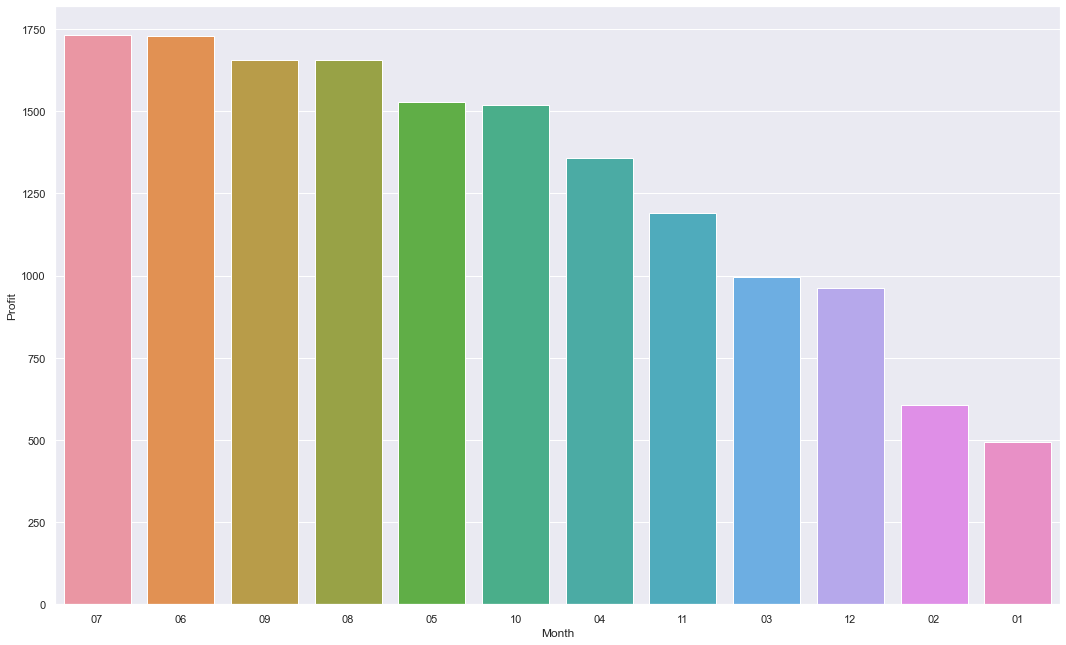

In [213]:
sns.barplot(data =x, x=x['Month'], y=x['Profit'])

### effect of season, weather  on profit ??

<AxesSubplot:xlabel='season', ylabel='Profit'>

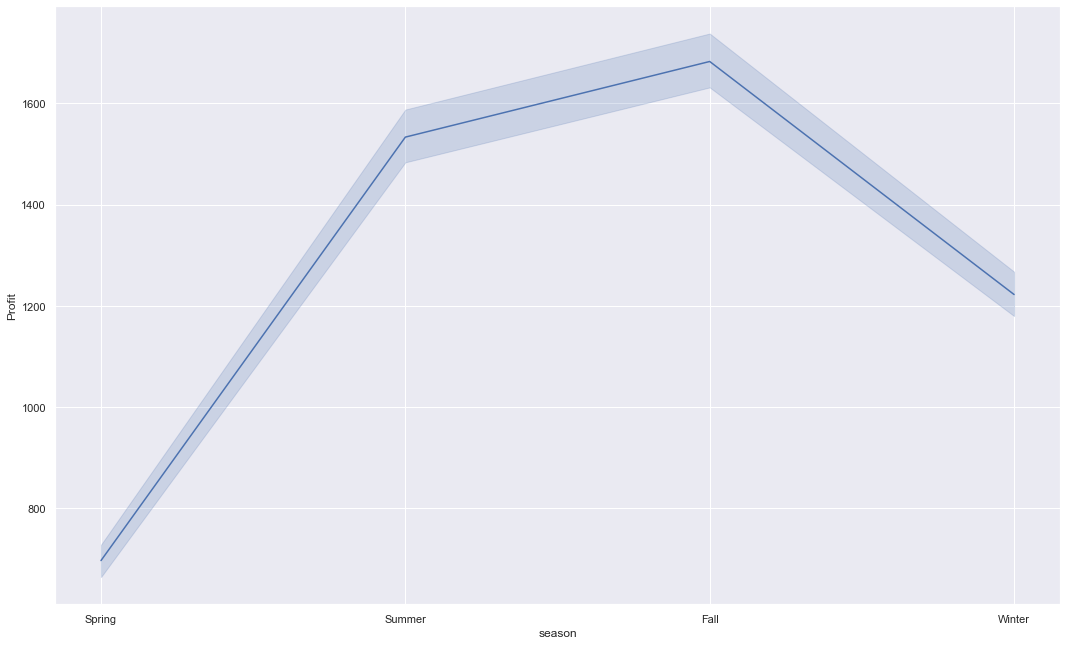

In [214]:
sns.lineplot(data=df,x = 'season', y= 'Profit')

### relation between weather and profit , rented_bikes_count ??

In [174]:
df['weather'].value_counts()

Clear    5793
Mist     2259
Rainy     693
Snowy       1
Name: weather, dtype: int64

In [180]:
x=df.groupby(['weather','rented_bikes_count'])['Profit'].sum().to_frame()
x.reset_index(inplace=True)
x

,weather,rented_bikes_count,Profit
0,Clear,1,333.897260
1,Clear,2,737.926027
2,Clear,3,1251.871233
3,Clear,4,1853.528767
4,Clear,5,2578.002740
...,...,...,...
1581,Rainy,782,4575.028767
1582,Rainy,812,4497.628767
1583,Rainy,856,4519.128767
1584,Rainy,891,5185.628767


<AxesSubplot:xlabel='rented_bikes_count', ylabel='Profit'>

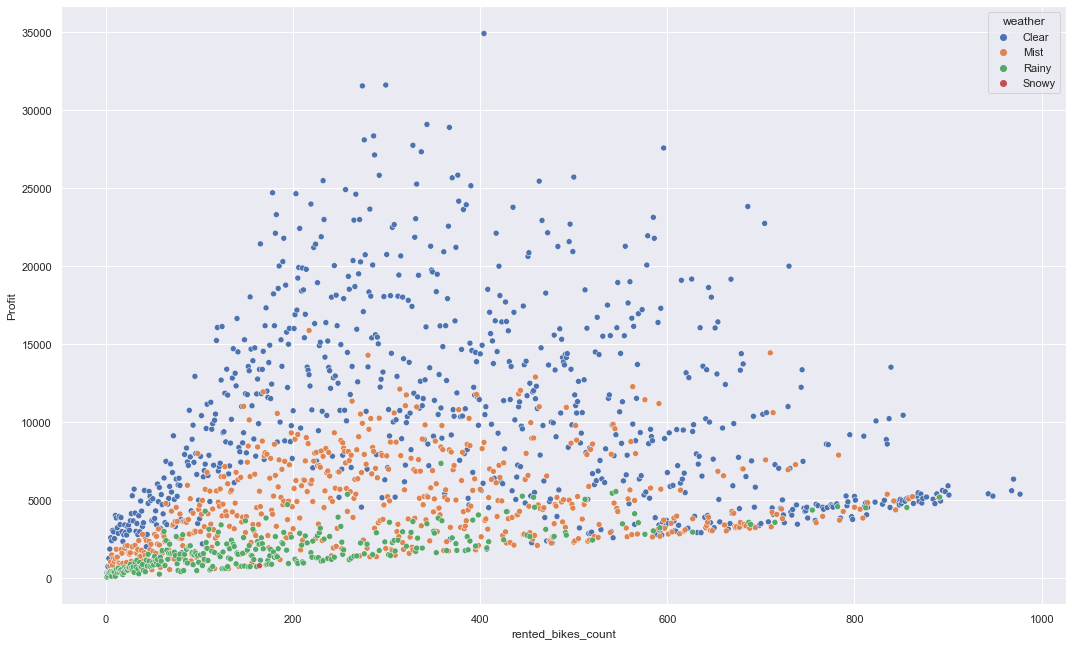

In [184]:
sns.scatterplot(data =x, x= x['rented_bikes_count'], y=x['Profit'] , hue='weather')

### profit each month each year ??

In [139]:
heatmap= pd.pivot_table(data = df , columns= 'Month', index = 'Year' , values = 'Profit'  ) 
heatmap

Month,01,02,03,04,05,06,07,08,09,10,11,12
Year,,,,,,,,,,,,
2011,294.902549,425.702310,602.069799,823.954481,1200.320872,1400.874381,1614.997407,1282.624381,1272.144661,1237.841295,955.579206,720.455960
2012,683.879981,782.636679,1381.536899,1890.663789,1854.618679,2054.389513,1849.724600,2028.089732,2038.509688,1798.058592,1428.232064,1205.337539


<AxesSubplot:xlabel='Month', ylabel='Year'>

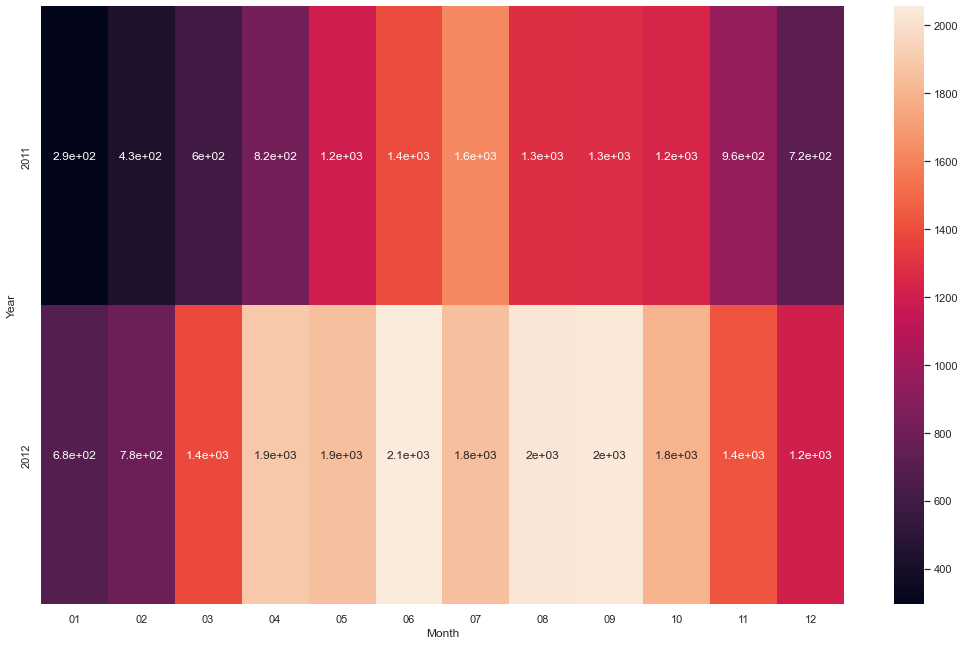

In [140]:
sns.heatmap(data = heatmap, annot=True)

### relation between humidity,windspeed,Profit

In [192]:
x=df.groupby(['humidity','windspeed'])['Profit'].sum().sort_values(ascending=False).head(10).to_frame()
x.reset_index(inplace=True)
x

,humidity,windspeed,Profit
0,77.0,0.0000,27232.775342
1,41.0,15.0013,26786.602740
2,55.0,15.0013,26528.945205
3,66.0,11.0014,25384.289041
4,52.0,16.9979,25380.160274
5,65.0,16.9979,25226.216438
6,40.0,12.9980,23686.645205
7,66.0,16.9979,23647.945205
8,36.0,19.0012,23158.772603
9,46.0,19.0012,22565.201370


### each season mounth has high profit 

In [201]:
x=df.groupby(['Month', 'season'])['Profit'].sum().sort_values(ascending=False).to_frame()
x.reset_index(inplace=True)
x

,Month,season,Profit
0,07,Fall,1.540443e+06
1,06,Summer,1.532771e+06
2,08,Fall,1.486163e+06
3,09,Fall,1.482689e+06
4,10,Winter,1.364758e+06
5,05,Summer,1.363183e+06
6,04,Summer,1.197820e+06
7,11,Winter,1.051661e+06
8,12,Winter,8.695938e+05
9,03,Spring,8.669276e+05


<AxesSubplot:xlabel='season', ylabel='Profit'>

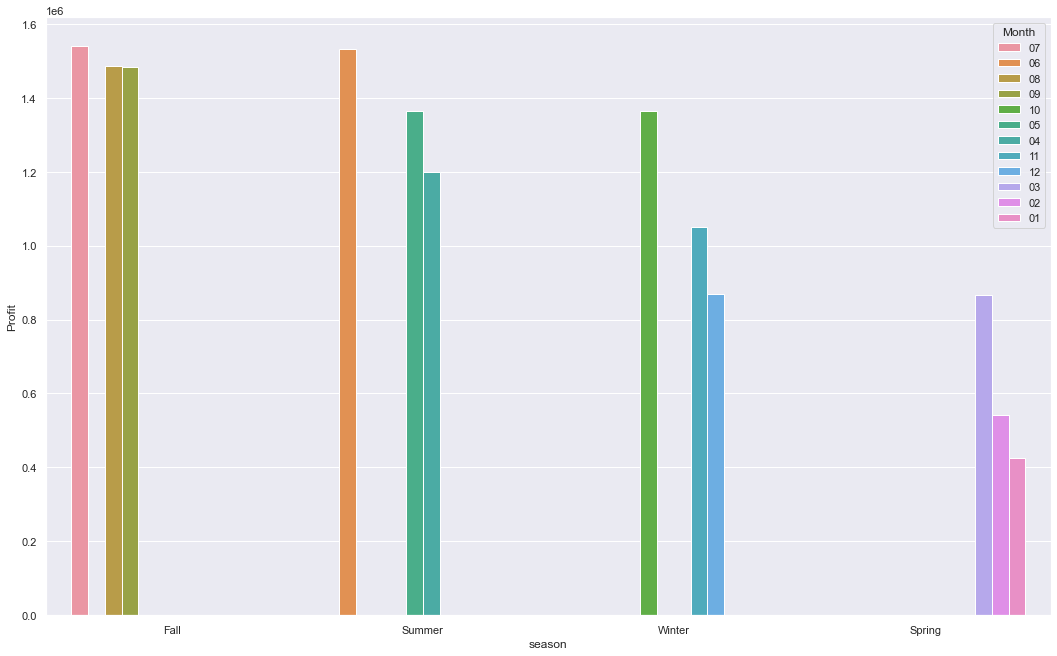

In [202]:
sns.barplot(data = x, x = x['season'], y= x['Profit'], hue = x['Month'])

### in 2011 and 2012 what is profit for each season ??

In [218]:
heatmap=pd.pivot_table(data = df , index = 'Year' , columns='season' , values='Profit', aggfunc=np.sum)
heatmap

season,Fall,Spring,Summer,Winter
Year,,,,
2011,1.874024e+06,5.734060e+05,1.521365e+06,1.304898e+06
2012,2.635271e+06,1.262888e+06,2.572410e+06,1.981115e+06


<AxesSubplot:xlabel='season', ylabel='Year'>

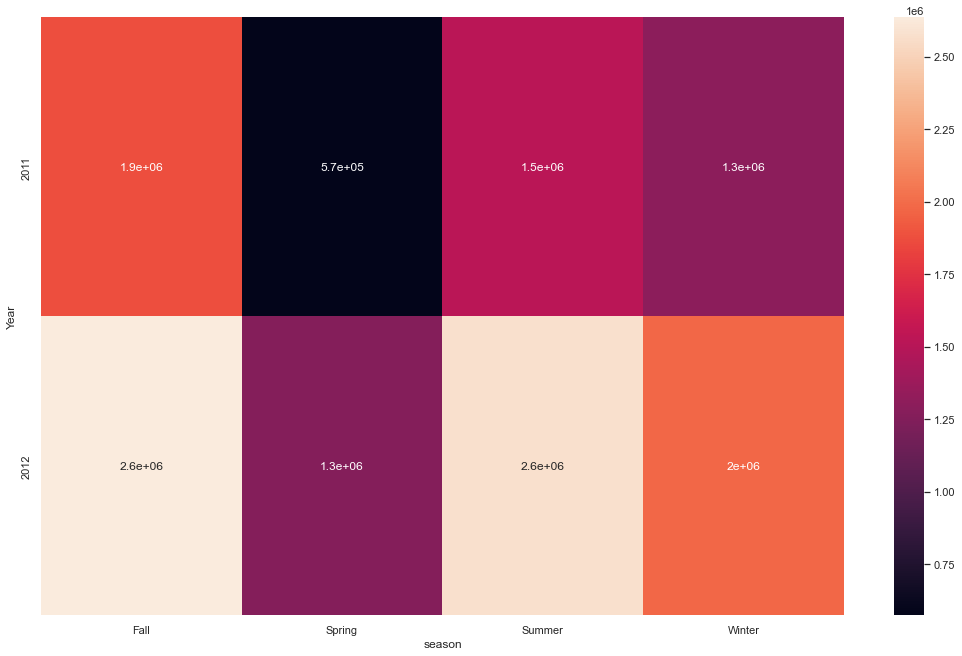

In [220]:
sns.heatmap(data = heatmap , annot= True) 

### outlier profit for each season ??

<AxesSubplot:xlabel='season', ylabel='Profit'>

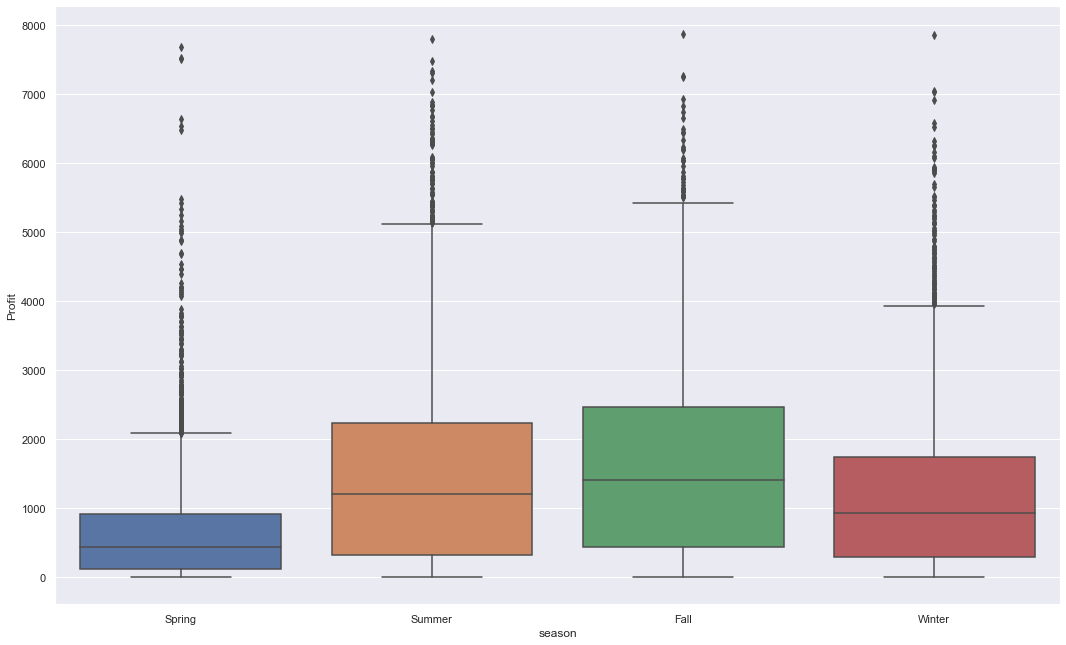

In [221]:
sns.boxplot(data = df , x = 'season' , y='Profit')

# THANK YOU!